# Importing the Libraries

In [4]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [5]:
import folium
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector

In [6]:
import folium
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector
from geopy.geocoders import Nominatim

# Importing the Dataset

In [7]:
df=pd.read_csv('ClimateData.csv').drop(columns=['Unnamed: 0'])

In [8]:
df['dt']=pd.to_datetime(df.dt)

In [9]:
df['year'] = pd.DatetimeIndex(df['dt']).year
df['month'] = pd.DatetimeIndex(df['dt']).month

In [10]:
df=df[df['year']>1950]

In [11]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
0,1951-01-01,26.944,0.441,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,1
1,1951-02-01,27.118,0.569,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,2
2,1951-03-01,27.983,0.274,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,3
3,1951-04-01,27.914,0.204,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,4
4,1951-05-01,26.690,0.168,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,5


In [14]:
df.year=df.year.astype(int)

In [18]:
des=df.describe().drop('count')
des.year=des.year.astype(int)
des.month=des.month.astype(int)

In [19]:
des

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year,month
mean,19.234326,0.373493,21.482915,44.078536,1981,6
std,9.613328,0.214970,21.704939,67.201371,18,3
min,-23.922000,0.040000,-37.814218,-118.242767,1951,1
25%,14.330500,0.243000,9.869479,3.255300,1966,3
50%,21.580000,0.323000,26.838100,44.378799,1982,6
75%,26.588000,0.441000,37.870009,104.063322,1998,9
max,38.283000,4.399000,59.938732,151.216454,2013,12


# Display the cities on a WorldMap

In [20]:
geolocator = Nominatim(user_agent="Piero")


In [23]:
city_data=df.drop_duplicates(subset='City')

In [24]:
from geopy.geocoders import Nominatim
world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        lat = city_data.iloc[i]['Latitude']
        long = city_data.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True).add_to(marker_cluster)

In [25]:
world_map

In [30]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
0,1951-01-01,26.944,0.441,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,1
1,1951-02-01,27.118,0.569,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,2
2,1951-03-01,27.983,0.274,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,3
3,1951-04-01,27.914,0.204,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,4
4,1951-05-01,26.690,0.168,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,5
...,...,...,...,...,...,...,...,...,...
75202,2013-04-01,12.563,1.823,Xian,China,34.346842,108.936589,2013,4
75203,2013-05-01,18.979,0.807,Xian,China,34.346842,108.936589,2013,5
75204,2013-06-01,23.522,0.647,Xian,China,34.346842,108.936589,2013,6
75205,2013-07-01,25.251,1.042,Xian,China,34.346842,108.936589,2013,7


In [38]:
CO[0:751]=np.repeat('Ivory Coast',751)

In [39]:
CO

['Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory Coast',
 'Ivory 

In [59]:
import pycountry_convert as pc
CO=df.Country.tolist()
CO[0:752]=np.repeat('Ivory Coast',752)
CO[CO.index('Congo (Democratic Republic Of The)'):CO.index('Congo (Democratic Republic Of The)')+752]=np.repeat('Congo',752)
Continent=[]
for co in CO:
    try:
        country_code = pc.country_name_to_country_alpha2(co, cn_name_format="default")
        Continent.append(pc.country_alpha2_to_continent_code(country_code))
    except:
        #print(co)
        Continent.append('AF')
    

In [60]:
df['Continent']=Continent

In [67]:
df.groupby(['Continent']).count().dt

Continent
AF    15040
AS    39856
EU     6016
NA     5271
OC     1504
SA     7520
Name: dt, dtype: int64

In [68]:
labels=['Africa','Asia','Europe','North America','Oceania','South and Central America']

([<matplotlib.patches.Wedge at 0x7ff4f7e7c490>,
 [Text(-0.7052855468543572, 0.9708616262878818, 'Africa'),
  Text(-0.2620902665549996, -1.1710289032202106, 'Asia'),
  Text(1.1906052320116467, 0.14986387658970132, 'Europe'),
  Text(0.9926326860110094, 0.6742998966799335, 'North America'),
  Text(0.7648492070903337, 0.9246651774633282, 'Oceania'),
  Text(0.37078688659640213, 1.141278705982087, 'South and Central America')],
 [Text(-0.41141656899837503, 0.5663359486679309, '20%'),
  Text(-0.15288598882374976, -0.6831001935451229, '53%'),
  Text(0.6945197186734604, 0.08742059467732576, '8%'),
  Text(0.5790357335064221, 0.39334160639662785, '7%'),
  Text(0.44616203746936123, 0.5393880201869414, '2%'),
  Text(0.2162923505145679, 0.6657459118228841, '10%')])

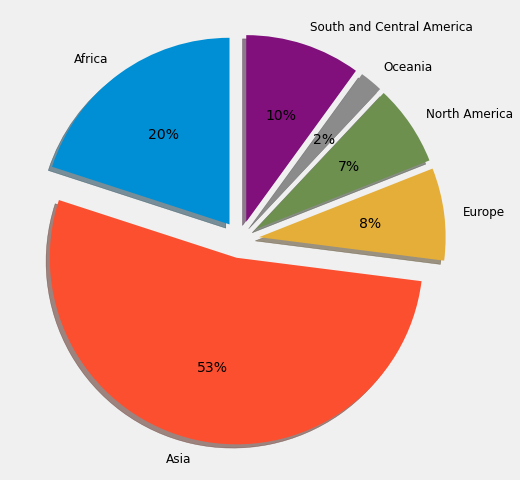

In [74]:
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(df.groupby(['Continent']).count().dt, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)

In [76]:
import random

In [87]:
len(df[df['City']=='Rome'].AverageTemperature)


array([1951.        , 1951.08255659, 1951.16511318, 1951.24766977,
       1951.33022636, 1951.41278296, 1951.49533955, 1951.57789614,
       1951.66045273, 1951.74300932, 1951.82556591, 1951.9081225 ,
       1951.99067909, 1952.07323569, 1952.15579228, 1952.23834887,
       1952.32090546, 1952.40346205, 1952.48601864, 1952.56857523,
       1952.65113182, 1952.73368842, 1952.81624501, 1952.8988016 ,
       1952.98135819, 1953.06391478, 1953.14647137, 1953.22902796,
       1953.31158455, 1953.39414115, 1953.47669774, 1953.55925433,
       1953.64181092, 1953.72436751, 1953.8069241 , 1953.88948069,
       1953.97203728, 1954.05459387, 1954.13715047, 1954.21970706,
       1954.30226365, 1954.38482024, 1954.46737683, 1954.54993342,
       1954.63249001, 1954.7150466 , 1954.7976032 , 1954.88015979,
       1954.96271638, 1955.04527297, 1955.12782956, 1955.21038615,
       1955.29294274, 1955.37549933, 1955.45805593, 1955.54061252,
       1955.62316911, 1955.7057257 , 1955.78828229, 1955.87083

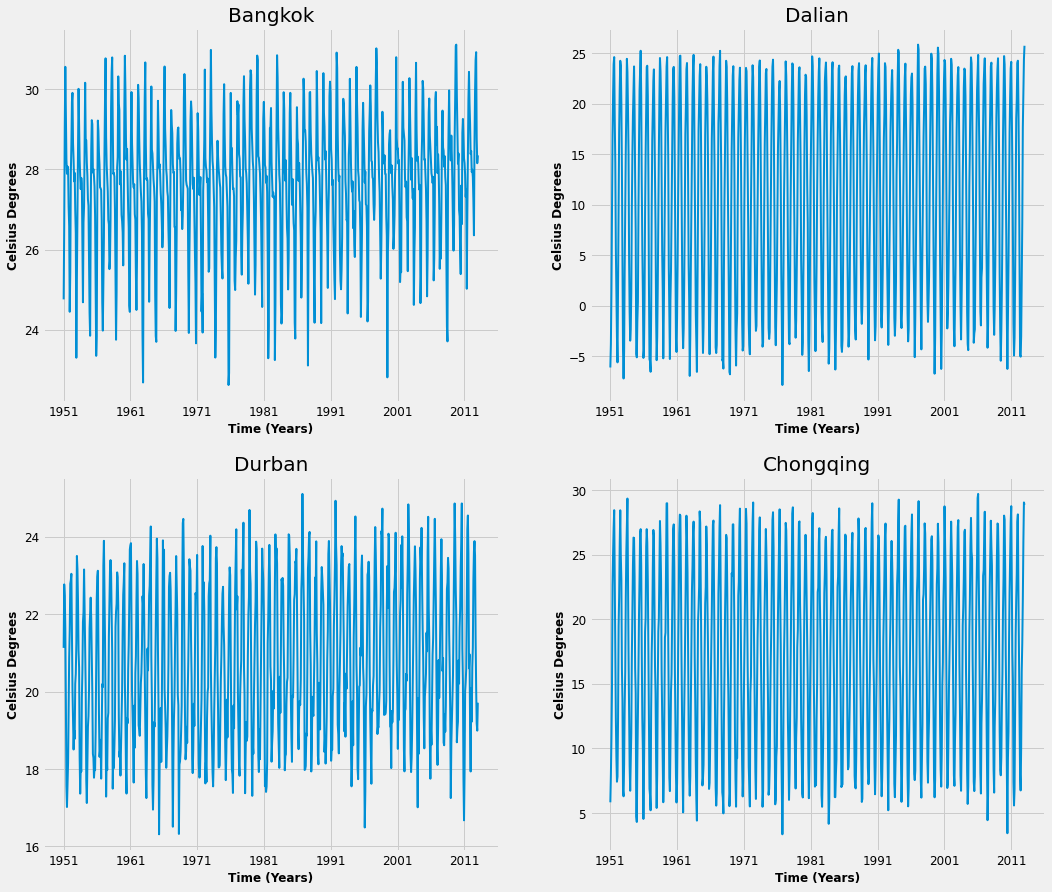

In [104]:
CITIES=df.City.drop_duplicates().tolist()
T=np.linspace(1951,2013,752)
TICK=np.arange(1951,2013,10)
plt.subplots_adjust(top=1.5)

for k in range(1,5):
    plt.subplot(2,2,k)
    c=random.choice(CITIES)
    TEMP=np.array(df[df['City']==c].AverageTemperature)
    plt.plot(T,TEMP)
    plt.xticks(TICK)
    plt.grid(True)
    plt.xlabel('Time (Years)')
    plt.ylabel('Celsius Degrees')
    plt.title(c,fontsize=20)


In [110]:
London=df[df['City']=='London']
YEAR_LON=[]
for y in London.year.drop_duplicates().tolist():
    YEAR_LON.append(London[London['year']==y].AverageTemperature.mean())
years=London.year.drop_duplicates().tolist()

In [114]:
T

array([1951.        , 1951.08255659, 1951.16511318, 1951.24766977,
       1951.33022636, 1951.41278296, 1951.49533955, 1951.57789614,
       1951.66045273, 1951.74300932, 1951.82556591, 1951.9081225 ,
       1951.99067909, 1952.07323569, 1952.15579228, 1952.23834887,
       1952.32090546, 1952.40346205, 1952.48601864, 1952.56857523,
       1952.65113182, 1952.73368842, 1952.81624501, 1952.8988016 ,
       1952.98135819, 1953.06391478, 1953.14647137, 1953.22902796,
       1953.31158455, 1953.39414115, 1953.47669774, 1953.55925433,
       1953.64181092, 1953.72436751, 1953.8069241 , 1953.88948069,
       1953.97203728, 1954.05459387, 1954.13715047, 1954.21970706,
       1954.30226365, 1954.38482024, 1954.46737683, 1954.54993342,
       1954.63249001, 1954.7150466 , 1954.7976032 , 1954.88015979,
       1954.96271638, 1955.04527297, 1955.12782956, 1955.21038615,
       1955.29294274, 1955.37549933, 1955.45805593, 1955.54061252,
       1955.62316911, 1955.7057257 , 1955.78828229, 1955.87083

In [132]:
plt.subplots_adjust(top=5.)


<Figure size 1152x576 with 0 Axes>

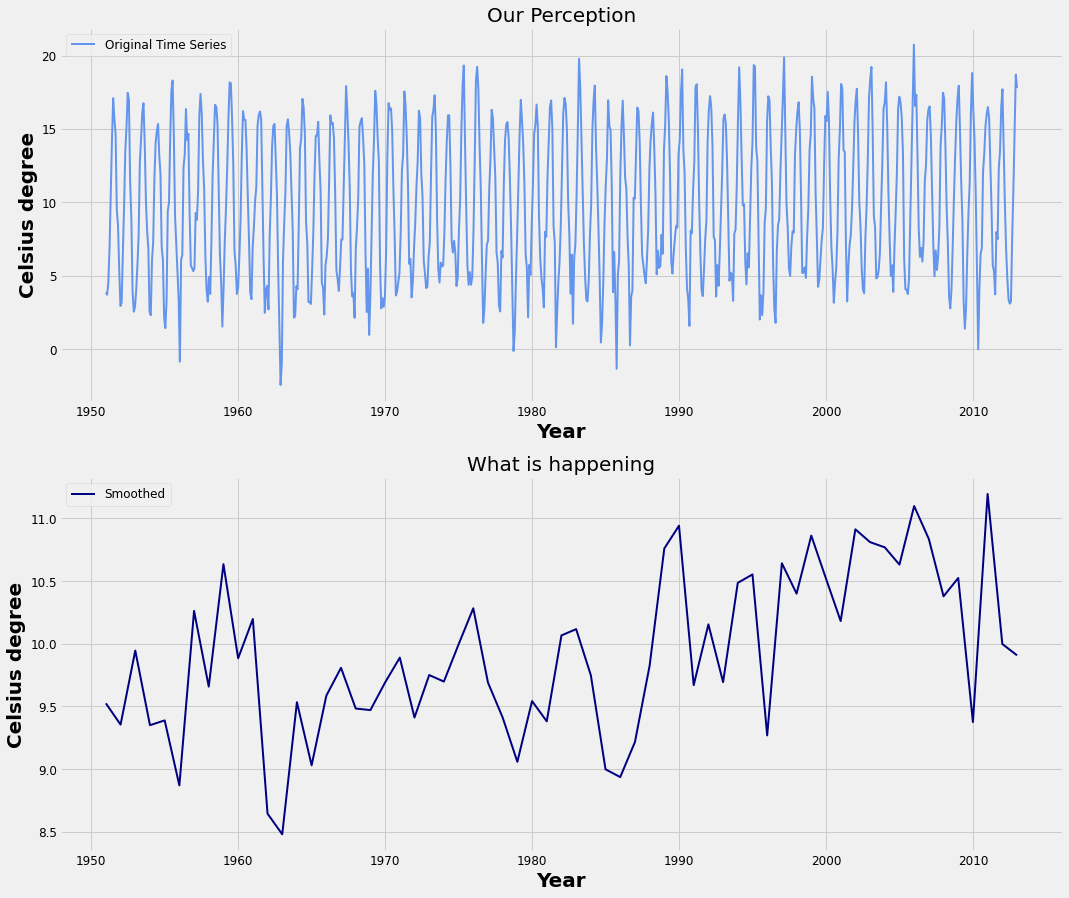

In [137]:
plt.subplot(2,1,1)
plt.subplots_adjust(top=1.5)

plt.plot(T,np.array(df[df['City']=='London'].AverageTemperature),label='Original Time Series',color='cornflowerblue')
plt.grid(True)
#plt.plot(years,YEAR_LON,label='Smoothed',color='navy')
plt.title('Our Perception',fontsize=20)
plt.ylabel('Celsius degree',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend()
#plt.xticks(np.arange(0,len(YEAR_LON),10),np.arange(min(years),max(years),10))
plt.grid(True)
plt.subplot(2,1,2)
plt.title('What is happening',fontsize=20)
plt.plot(years,YEAR_LON,label='Smoothed',color='navy')
plt.ylabel('Celsius degree',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend()
#plt.xticks(np.arange(0,len(YEAR_LON),10),np.arange(min(years),max(years),10))
plt.grid(True)